In [66]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt


## Part 3: Law of large numbers.

In [74]:
# Setting randomseed to ensure reproducibility:

np.random.seed(1337)

In [75]:
gaus = 0 + 4*np.random.standard_normal(10000) # 10000 random numbers from a normal distribution with mean 0 and standard deviation 4

In [76]:
len(gaus) # lenght of the array

10000

(array([  2.,   0.,   4.,  11.,  10.,  27.,  47.,  76., 107., 158., 251.,
        338., 421., 564., 629., 734., 816., 839., 855., 803., 769., 679.,
        535., 414., 309., 210., 154., 106.,  51.,  36.,  17.,  14.,   5.,
          3.,   3.,   3.]),
 array([-15.36624322, -14.50754133, -13.64883945, -12.79013756,
        -11.93143568, -11.0727338 , -10.21403191,  -9.35533003,
         -8.49662814,  -7.63792626,  -6.77922437,  -5.92052249,
         -5.06182061,  -4.20311872,  -3.34441684,  -2.48571495,
         -1.62701307,  -0.76831119,   0.0903907 ,   0.94909258,
          1.80779447,   2.66649635,   3.52519824,   4.38390012,
          5.242602  ,   6.10130389,   6.96000577,   7.81870766,
          8.67740954,   9.53611142,  10.39481331,  11.25351519,
         12.11221708,  12.97091896,  13.82962085,  14.68832273,
         15.54702461]),
 <BarContainer object of 36 artists>)

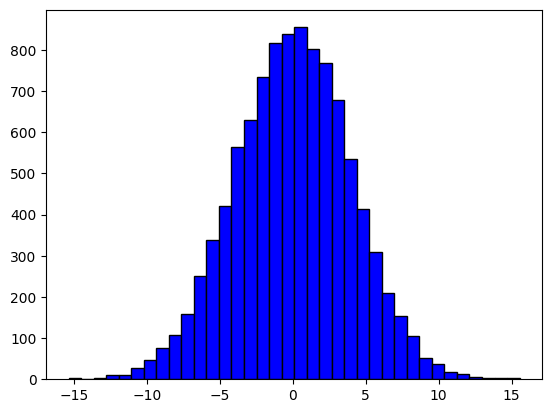

In [77]:
plt.hist(gaus, color = 'blue', edgecolor = 'black', bins = int(180/5)) # histogram of the array

In [78]:
# Cumulative average:

a = range(1,len(gaus)+1) # array of numbers from 1 to 10000
cumaverage = np.cumsum(gaus)/a # cumulative average of the gaussian distribution
print(cumaverage)

[-2.81274924 -2.38693935 -2.02037867 ...  0.00810379  0.00778983
  0.00809294]


In [79]:
# Cumulative standard error:

cum_std_error = sorted(gaus)/np.sqrt(np.arange(10000)) # cumulative standard error of the gaussian distribution
cum_std_error[0] = 0  # set the first element to 0 # cumulative standard error of the gaussian distribution
print(cum_std_error)

[  0.         -15.12393561  -9.48523746 ...   0.15164255   0.15511336
   0.15547802]


C:\Users\Mathias\AppData\Local\Temp\ipykernel_11980\4249670950.py:3: RuntimeWarning: divide by zero encountered in true_divide
  cum_std_error = sorted(gaus)/np.sqrt(np.arange(10000)) # cumulative standard error of the gaussian distribution


In [80]:
print('mean:', np.mean(gaus)) # mean of the gaussian distribution
print('median:', np.median(gaus)) # median of the gaussian distribution


mean: 0.00809293929608944
median: 0.05844749002369397


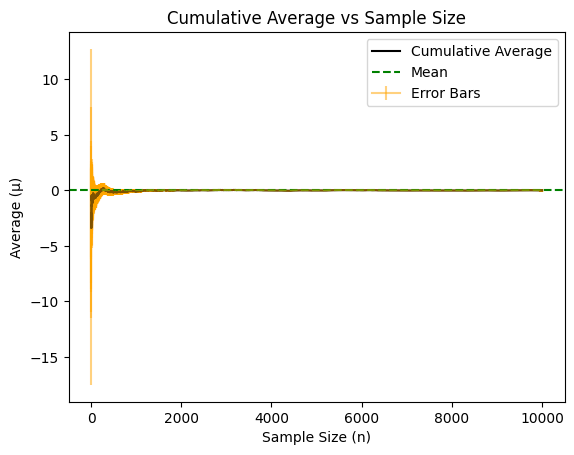

In [81]:
# Culimative average plot:

fig, ax = plt.subplots()

# Plot cumulative average as a line plot 
ax.errorbar(np.arange(10000), cumaverage, yerr=cum_std_error, color="orange", alpha=0.5, label='Error Bars') # Add errorbars to each point in the graph  
ax.plot(np.arange(10000), cumaverage, color='black', label='Cumulative Average') # Plot the cumulative average as a line plot
ax.axhline(y=np.mean(gaus), color='green', linestyle='--', label='Mean') # Add a horizontal line corresponding to the mean of "gaus"  

 # Set labels and title for the plot  
ax.set_title('Cumulative Average vs Sample Size')  
ax.set_xlabel('Sample Size (n)')  
ax.set_ylabel('Average (μ)')  

 # Show legend and display plot 
plt.legend()  
plt.show()

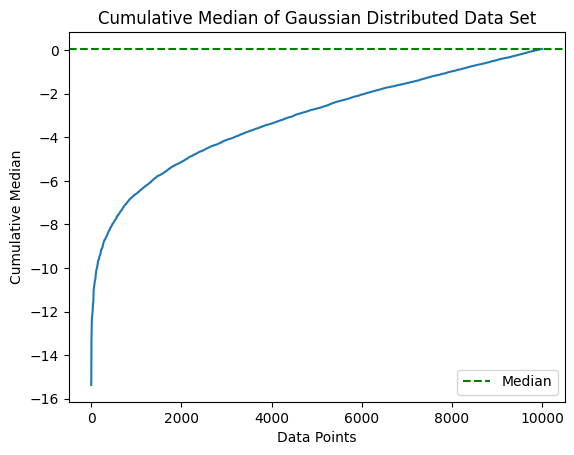

In [82]:
# Sort the data set in ascending order 
data_sorted = np.sort(gaus) 
  
# Compute the cumulative median of the data set and store it in an array 
cumulative_median_gauss = [] 
for i in range(len(data_sorted)): 
    cumulative_median_gauss.append(np.median(data_sorted[:i+1])) 

# Plot the cumulative median array  
plt.plot(cumulative_median_gauss)
plt.axhline(y=np.median(gaus), color='green', linestyle='--', label='Median')
plt.title('Cumulative Median of Gaussian Distributed Data Set')  
plt.xlabel('Data Points')  
plt.ylabel('Cumulative Median')
plt.legend()
plt.show()

# Pareto

In [21]:
N = 10000
alpha = 2
x_m = 1
pareto = x_m*(np.random.pareto(alpha, N)+1) # 10000 random numbers from a lognormal distribution with mean 1 and standard deviation 2

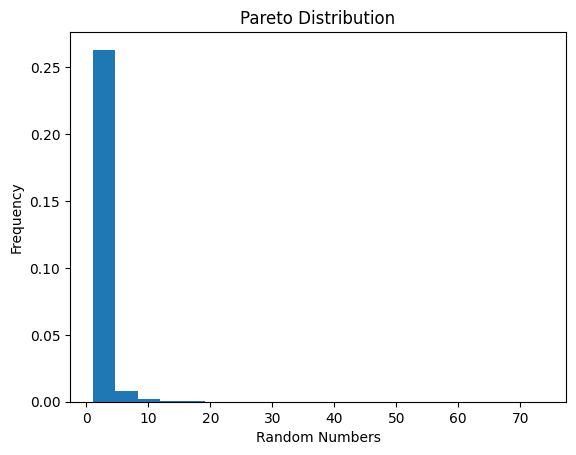

Cumulative Avg: [1.09274613 1.11959336 1.25656584 ... 1.93108743 1.93110927 1.93105368]
Cumulative Std: [0.         1.00014742 0.70724148 ... 0.54245403 0.65855216 0.73760514]
mean: 1.931053680501932
median: 1.4036991754481405


C:\Users\Mathias\AppData\Local\Temp\ipykernel_11980\3482678276.py:13: RuntimeWarning: divide by zero encountered in true_divide
  cum_std_error_par = sorted(pareto)/np.sqrt(np.arange(10000)) # cumulative standard error of the pareto distribution


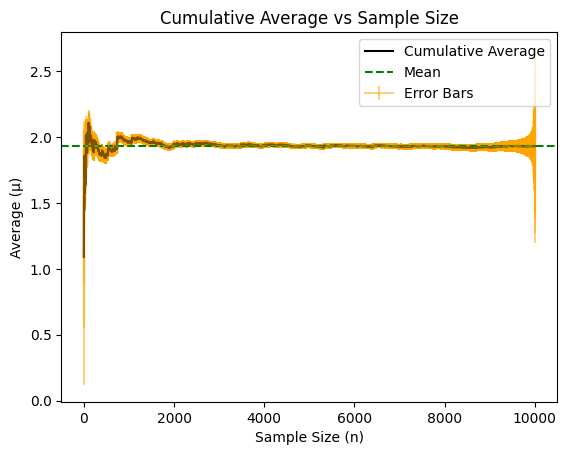

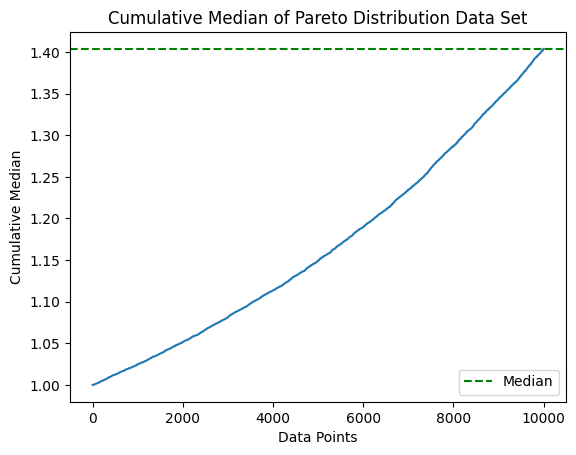

In [83]:
# Plot the histogram of the data 
plt.hist(pareto, bins=20, density=True) 
plt.title('Pareto Distribution') 
plt.xlabel('Random Numbers') 
plt.ylabel('Frequency') 
plt.show()

# Cumulative average
cumaverage_par = np.cumsum(pareto)/(range(1,len(pareto)+1))
print('Cumulative Avg:',cumaverage_par)

# Cumulative standard error
cum_std_error_par = sorted(pareto)/np.sqrt(np.arange(10000)) # cumulative standard error of the pareto distribution
cum_std_error_par[0] = 0  # set the first element to 0 # cumulative standard error of the pareto distribution
print('Cumulative Std:',cum_std_error_par)

# Compute mean and median of the data set:

print('mean:', np.mean(pareto))
print('median:', np.median(pareto))


# Culimative average plot:
fig, ax = plt.subplots()

# Plot cumulative average as a line plot 
ax.errorbar(np.arange(10000), cumaverage_par, yerr=cum_std_error_par, color="orange", alpha=0.5, label='Error Bars') # Add errorbars to each point in the graph  
ax.plot(np.arange(10000), cumaverage_par, color='black', label='Cumulative Average') # Plot the cumulative average as a line plot
ax.axhline(y=np.mean(pareto), color='green', linestyle='--', label='Mean') # Add a horizontal line corresponding to the mean of "gaus"  

 # Set labels and title for the plot  
ax.set_title('Cumulative Average vs Sample Size')  
ax.set_xlabel('Sample Size (n)')  
ax.set_ylabel('Average (μ)')  

 # Show legend and display plot 
plt.legend()  
plt.show()

# Sort the data set in ascending order 
data_sorted_par = np.sort(pareto) 
  
# Compute the cumulative median of the data set and store it in an array 
cumulative_median_par = [] 
for i in range(len(data_sorted_par)): 
    cumulative_median_par.append(np.median(data_sorted_par[:i+1])) 

# Plot the cumulative median array  
plt.plot(cumulative_median_par) 
plt.axhline(y=np.median(pareto), color='green', linestyle='--', label='Median')
plt.title('Cumulative Median of Pareto Distribution Data Set')  
plt.xlabel('Data Points')  
plt.ylabel('Cumulative Median')
plt.legend()
plt.show()


# Lognormal

In [23]:
mu = 2
sigma = 0.5
N = 10000
lognor = np.random.lognormal(mean=mu, sigma=sigma, size=N) # 10000 random numbers from a lognormal distribution with mean 2 and standard deviation 0.5

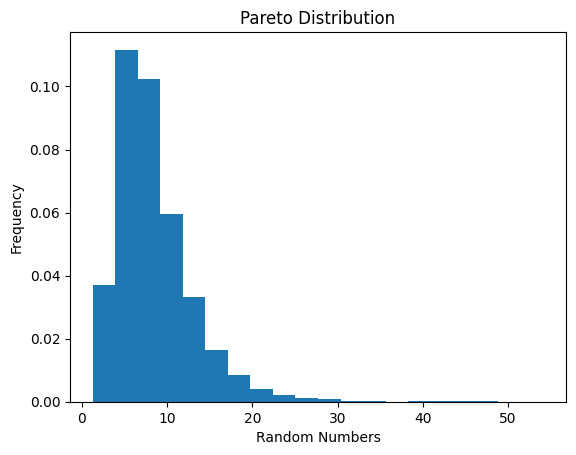

Cumulative Avg: [6.44277073 5.77058773 8.20741963 ... 8.44318149 8.44323008 8.44264438]
Cumulative Std: [0.         1.35955438 0.98682972 ... 0.47574977 0.4802354  0.54143418]
mean: 8.4426443826969
median: 7.452945263039547


C:\Users\Mathias\AppData\Local\Temp\ipykernel_11980\1552225444.py:13: RuntimeWarning: divide by zero encountered in true_divide
  cum_std_error_lognor = sorted(lognor)/np.sqrt(np.arange(10000)) # cumulative standard error of the pareto distribution


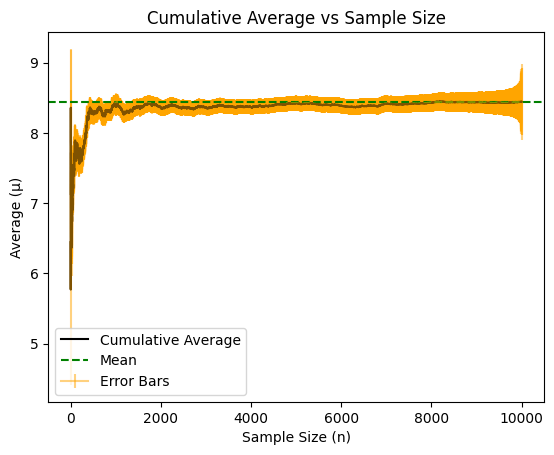

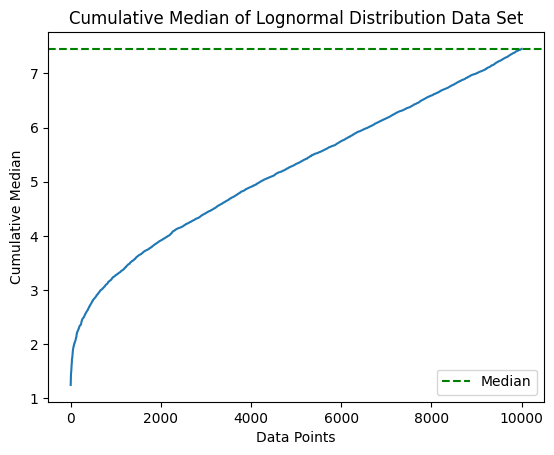

In [84]:
# Plot the histogram of the data 
plt.hist(lognor, bins=20, density=True) 
plt.title('Pareto Distribution') 
plt.xlabel('Random Numbers') 
plt.ylabel('Frequency') 
plt.show()

# Cumulative average
cumaverage_lognor = np.cumsum(lognor)/(range(1,len(lognor)+1))
print('Cumulative Avg:',cumaverage_lognor)

# Cumulative standard error
cum_std_error_lognor = sorted(lognor)/np.sqrt(np.arange(10000)) # cumulative standard error of the pareto distribution
cum_std_error_lognor[0] = 0  # set the first element to 0 # cumulative standard error of the pareto distribution
print('Cumulative Std:',cum_std_error_lognor)

# Compute mean and median of the data set:
print('mean:', np.mean(lognor))
print('median:', np.median(lognor))

# Culimative average plot:
fig, ax = plt.subplots()

# Plot cumulative average as a line plot 
ax.errorbar(np.arange(10000), cumaverage_lognor, yerr=cum_std_error_lognor, color="orange", alpha=0.5, label='Error Bars') # Add errorbars to each point in the graph  
ax.plot(np.arange(10000), cumaverage_lognor, color='black', label='Cumulative Average') # Plot the cumulative average as a line plot
ax.axhline(y=np.mean(lognor), color='green', linestyle='--', label='Mean') # Add a horizontal line corresponding to the mean of "gaus"  

 # Set labels and title for the plot  
ax.set_title('Cumulative Average vs Sample Size')  
ax.set_xlabel('Sample Size (n)')  
ax.set_ylabel('Average (μ)')  

 # Show legend and display plot 
plt.legend()  
plt.show()

# Sort the data set in ascending order 
data_sorted_lognor = np.sort(lognor) 
  
# Compute the cumulative median of the data set and store it in an array 
cumulative_median_lognor = [] 
for i in range(len(data_sorted_lognor)): 
    cumulative_median_lognor.append(np.median(data_sorted_lognor[:i+1])) 

# Plot the cumulative median array  
plt.plot(cumulative_median_lognor) 
plt.axhline(y=np.median(lognor), color='green', linestyle='--', label='Median')
plt.title('Cumulative Median of Lognormal Distribution Data Set')  
plt.xlabel('Data Points')  
plt.ylabel('Cumulative Median')  
plt.legend()
plt.show()

## Repetition on 2009 papers: